<a href="https://colab.research.google.com/github/B00138946/Text-Analysis-Assignment-4th-year/blob/main/Text-Analysis-Assignment-4th-year/Text_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 1
import pandas as pd, numpy as np
import nltk, re
from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_rand_score,fowlkes_mallows_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_selection import chi2, f_classif
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV



from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

import text_mining_utils as tmu

## 2
data = pd.read_csv('British_Airway.csv')
print("Shape of the DataFrame:", data.shape)





Shape of the DataFrame: (2500, 2)


In [ ]:
data.stars = data.stars.astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2500 non-null   object
 1   stars    2500 non-null   string
dtypes: object(1), string(1)
memory usage: 39.2+ KB


In [ ]:
stats = data.describe()
stats

,reviews,stars
count,2500,2500
unique,2498,5
top,British Airways from Tampa to Gatwick on Boein...,3
freq,2,1137


In [ ]:
duplicate_reviews = stats['reviews'].loc['top']
print(duplicate_reviews)
data[data.reviews == duplicate_reviews]


British Airways from Tampa to Gatwick on Boeing 777 Club World. Having travelled out WT Plus to Miami we got a good deal coming back from Tampa so flew Club Class. Checked in at Tampa with no queues, and used the International Lounge at Tampa. Supposed to be exclusive to BA customers this had comfortable seats, and good choice of newspapers and magazines. Did not try WiFi. However, there was disappointingly very poor choice of snacks - a few dried up sorry looking sandwiches which were not replenished during my time there, and crackers with some processed cheese with a few dips, some wine, beer, liquor and soft drinks. Pretty uninspiring stuff. On board comfortable, if narrow, seats that extended into (more or less) flat beds. British Airways still have the very camped 2-4-2 layout with fellow passengers having to clamber over people to go to the rest room etc. Reasonable meal (beef) accompanied by an outstanding Chablis Premier Cru and a very nice Sauvignon Blanc. My wife slept for 5 

,reviews,stars
2444,British Airways from Tampa to Gatwick on Boein...,3
2472,British Airways from Tampa to Gatwick on Boein...,9


In [ ]:
## keep only one the 2 duplicated reviews
data = data.drop_duplicates(subset=['reviews'])
print(data.shape)
new_stats = data.describe()
new_stats

(2498, 2)


,reviews,stars
count,2498,2498
unique,2498,5
top,✅ Trip Verified | I had the most fantastic BA...,3
freq,1,1136


**Count, Normialised freq and tfidf Matrices**

In [ ]:
y = data.stars
dt_clf = DecisionTreeClassifier(random_state=1)

count_matrix = tmu.build_count_matrix(data.reviews)
tf_matrix = tmu.build_tf_matrix(data.reviews)
tfidf_matrix = tmu.build_tfidf_matrix(data.reviews)


tmu.printClassifReport(dt_clf, count_matrix, y)
tmu.printClassifReport(dt_clf, tf_matrix, y)
tmu.printClassifReport(dt_clf, tfidf_matrix, y)

              precision    recall  f1-score   support

           1       0.06      0.05      0.05       227
           3       0.45      0.51      0.48      1137
           5       0.28      0.27      0.27       682
           7       0.10      0.08      0.09       227
           9       0.09      0.08      0.09       227

    accuracy                           0.32      2500
   macro avg       0.20      0.20      0.20      2500
weighted avg       0.31      0.32      0.31      2500

              precision    recall  f1-score   support

           1       0.05      0.04      0.04       227
           3       0.44      0.47      0.46      1137
           5       0.26      0.26      0.26       682
           7       0.09      0.07      0.08       227
           9       0.08      0.08      0.08       227

    accuracy                           0.30      2500
   macro avg       0.18      0.18      0.18      2500
weighted avg       0.29      0.30      0.30      2500

              precisio

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
one_all = ' '.join(data.reviews[data.stars == '1'])
three_all = ' '.join(data.reviews[data.stars == '3'])
five_all = ' '.join(data.reviews[data.stars == '5'])
seven_all = ' '.join(data.reviews[data.stars == '7'])
nine_all = ' '.join(data.reviews[data.stars == '9'])

# output the first 100 characters from each
one_all[:100], three_all[:100], five_all[:100], seven_all[:100], nine_all[:100]

('✅ Trip Verified | I chose British Airways especially because I was going to travel with my niece and',
 '✅ Trip Verified |  Couldn’t book in online. Arrived at check in to find we had been bumped off due t',
 '✅ Trip Verified |  I had the most fantastic BA Flight today. The cabin crew in my seat zone 6D were ',
 '✅ Trip Verified | A simple story with an unfortunate outcome that really could happen to anyone. My ',
 'Not Verified | I booked Premium Economy from INV to LAX (via LHR). They notified me of a cancelled f')

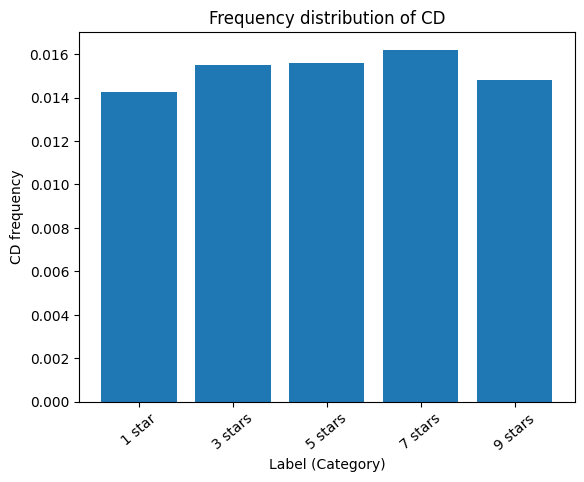

In [ ]:
all_texts = [one_all, three_all, five_all, seven_all, nine_all]
tmu.plotPOSFreq(all_texts, 'CD', ['1 star', '3 stars', '5 stars', '7 stars', '9 stars'])


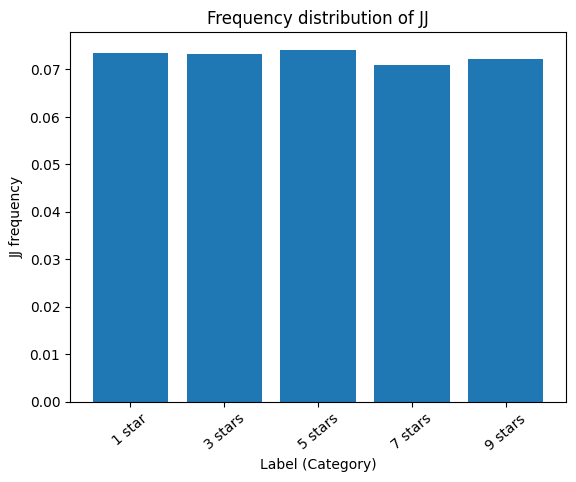

In [ ]:
tmu.plotPOSFreq(all_texts, 'JJ', ['1 star', '3 stars', '5 stars', '7 stars', '9 stars'])


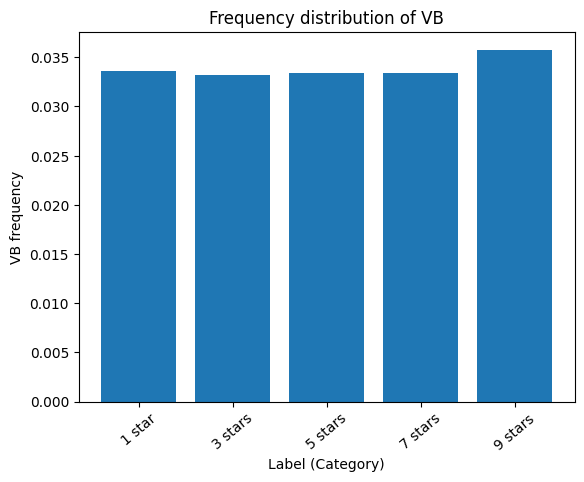

In [ ]:
tmu.plotPOSFreq(all_texts, 'VB', ['1 star', '3 stars', '5 stars', '7 stars', '9 stars'])

**Word Clouds**

=== 10 most frequent tokens in 1 star ===
	Frequency of "." is: 0.05017566197448775
	Frequency of "the" is: 0.0360283888613803
	Frequency of "to" is: 0.030534531135790244
	Frequency of "," is: 0.027351394685341066
	Frequency of "and" is: 0.026431821932989083
	Frequency of "a" is: 0.020277758128787342
	Frequency of "was" is: 0.0182971398929523
	Frequency of "I" is: 0.017754827756949847
	Frequency of "of" is: 0.012543915493621938
	Frequency of "in" is: 0.01181297304944472
=== 10 most frequent tokens in 3 stars ===
	Frequency of "." is: 0.05194715106895611
	Frequency of "the" is: 0.03814760519610246
	Frequency of "to" is: 0.030105577624757792
	Frequency of "and" is: 0.026826798126147456
	Frequency of "," is: 0.026026757430435768
	Frequency of "a" is: 0.019792914321653355
	Frequency of "was" is: 0.019483071971291024
	Frequency of "I" is: 0.017189313676071384
	Frequency of "of" is: 0.01250005780640865
	Frequency of "in" is: 0.011626024907625359
=== 10 most frequent tokens in 5 stars ===
	Fr

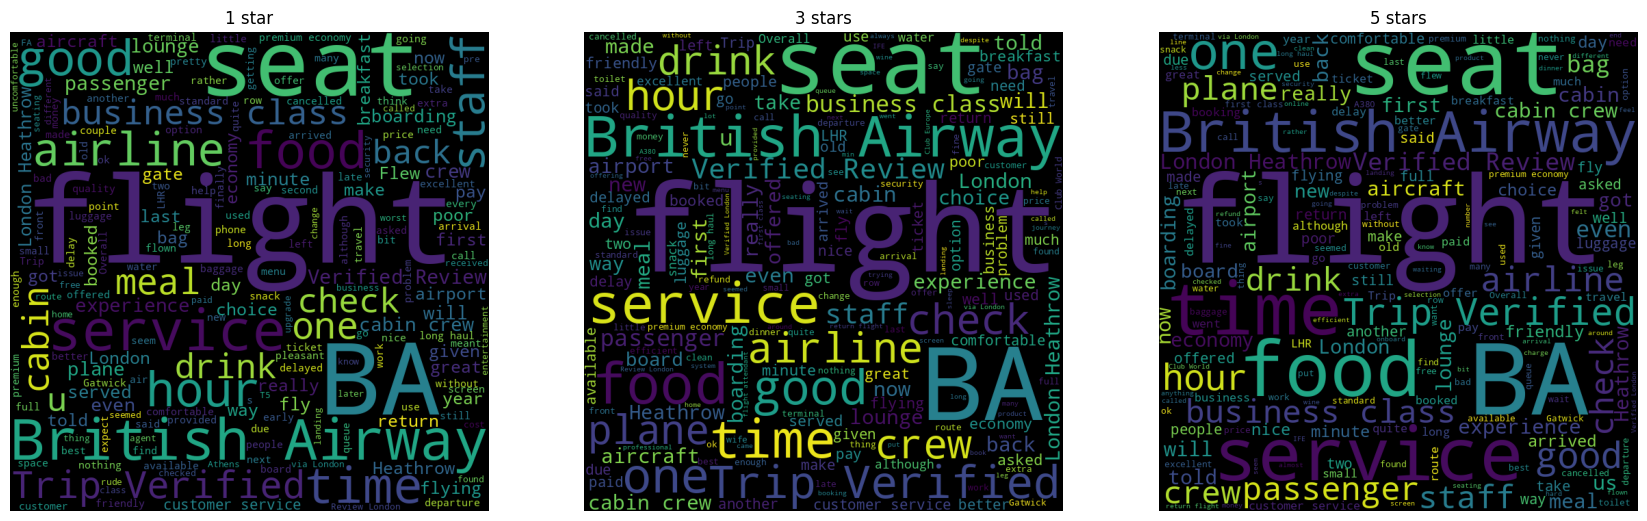

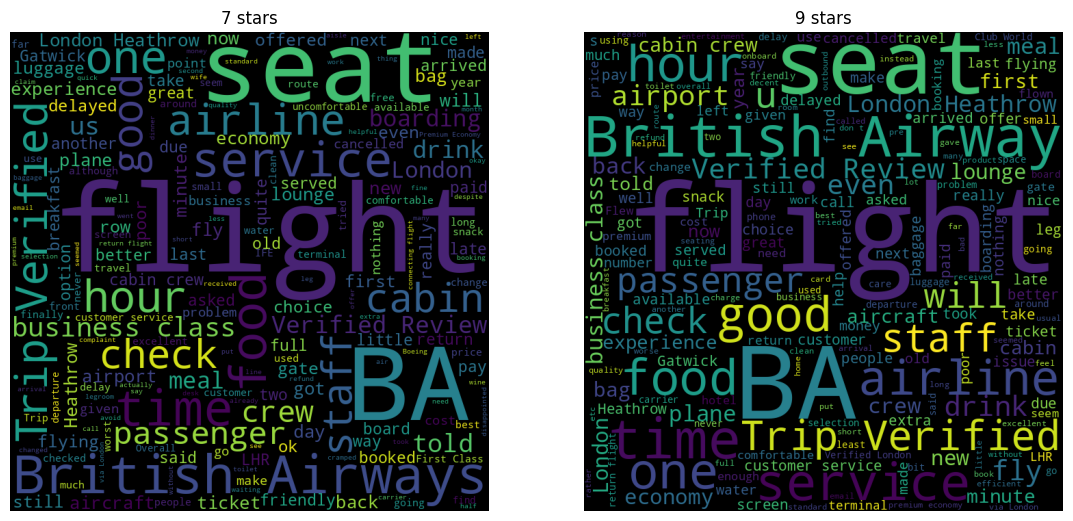

In [ ]:
one_docs = list(data.reviews[data.stars == '1'])
one_category = ' '.join(one_docs)

three_docs = list(data.reviews[data.stars == '3'])
three_category = ' '.join(three_docs)

five_docs = list(data.reviews[data.stars == '5'])
five_category = ' '.join(five_docs)

seven_docs = list(data.reviews[data.stars == '7'])
seven_category = ' '.join(seven_docs)

nine_docs = list(data.reviews[data.stars == '9'])
nine_category = ' '.join(nine_docs)

tmu.print_n_mostFrequent("1 star", one_category, 10)
tmu.print_n_mostFrequent("3 stars", three_category, 10)
tmu.print_n_mostFrequent("5 stars", five_category, 10)
tmu.print_n_mostFrequent("7 stars", seven_category, 10)
tmu.print_n_mostFrequent("9 stars", nine_category, 10)

tmu.generate_wordclouds([one_category, three_category, five_category],
['1 star', '3 stars', '5 stars'],
'black')

tmu.generate_wordclouds([seven_category, nine_category],
['7 stars', '9 stars'],
'black')



In [ ]:
y = data.stars
print(y)

0       5
1       3
2       3
3       5
4       5
       ..
2495    7
2496    3
2497    5
2498    3
2499    3
Name: stars, Length: 2500, dtype: string


In [ ]:
## compute cosine similarities
sims = cosine_similarity(tfidf_matrix)

## compute cosine distances
dists = cosine_distances(tfidf_matrix)

In [ ]:
## do kmeans random clustering
model_r, cluster_labels_r, cluster_centers_r = tmu.k_means_clustering(
tfidf_matrix, 3, 'random')
print(list(y))
print(cluster_labels_r)

['5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3',

In [ ]:
## do kmeans++ clustering
model_p, cluster_labels_p, cluster_centers_p = tmu.k_means_clustering(
tfidf_matrix, 3, 'k-means++')
print(list(y))
print(cluster_labels_p)


['5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3', '3', '5', '5', '3', '3', '1', '9', '7', '3', '5', '3',

KMeans Random - ARI score: -2.5711570468305967e-05
KMeans++ - ARI score: 0.0002991075292248948
KMeans Random - FMI score: 0.32712225123421784
KMeans++ - FMI score: 0.3270072936967492


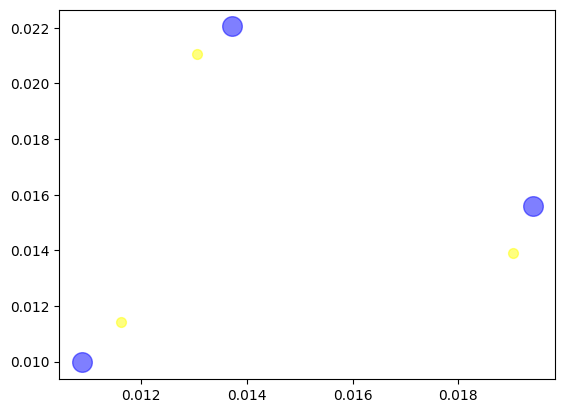

In [ ]:
## visualise cluster centers from both approaches
plt.scatter(cluster_centers_r[:, 0], cluster_centers_r[:, 1], c='blue', s=200, alpha=0.5)
plt.scatter(cluster_centers_p[:, 0], cluster_centers_p[:, 1], c='yellow', s=50, alpha=0.5)

## Evaluate clusters using the ground truth (the label column): compute the
## ARI and FMI scores for both k-means approaches: random and ++
print("KMeans Random - ARI score:",
adjusted_rand_score(cluster_labels_r, list(y)))
print("KMeans++ - ARI score:",
adjusted_rand_score(cluster_labels_p, list(y)))
print("KMeans Random - FMI score:",
fowlkes_mallows_score(cluster_labels_r, list(y)))
print("KMeans++ - FMI score:",
fowlkes_mallows_score(cluster_labels_p, list(y)))


**Basic cleaning**


In [ ]:
##Discovering the clean_operations of the Dataset
print(data.head(5))
print(data.tail(10))
# Print row 24
print("24:")
print(data.iloc[24]['reviews'])


                                             reviews stars
0  ✅ Trip Verified |  I had the most fantastic BA...     5
1  ✅ Trip Verified |  Couldn’t book in online. Ar...     3
2  ✅ Trip Verified | London Heathrow to Mumbai in...     3
3  ✅ Trip Verified | Keflavík, Iceland to London ...     5
4  ✅ Trip Verified | Terrible Experience with Bri...     5
                                                reviews stars
2490  Heathrow to Las Vegas with British Airways, an...     5
2491  Smooth take off and landing. Plane about 75%  ...     3
2492  Gatwick to Venice with British Airways. The pl...     3
2493  Round trip London to Luanda in British Airways...     1
2494  Not impressed with British Airways at all. We ...     9
2495  Roundtrip with British Airways from Bangkok to...     7
2496  Awful customer service. My wife and I have flo...     3
2497  I travelled from London to Sydney via Singapor...     5
2498  British Airways have just moved Cape Town flig...     3
2499  Bengaluru to Heathro

In [ ]:

clean_operations = {
r'\s+' : ' ', ## any type of white space to be replaced with a single white space
r'\s{2,}' : ' ', ## 2 or more consecutive white spaces to be replaced with a single white space
r'(\(.+?\))+' : '', ## paranthetical notes to be replaced by empty string


}
clean_data = data.copy()
clean_data.reviews = clean_data.reviews.apply(tmu.clean_doc, clean_operations=clean_operations)
print(clean_data.head(5))
print(clean_data.tail(10))
# Print row 24
print("24:")
print(clean_data.iloc[24]['reviews'])

dt_clf = DecisionTreeClassifier(random_state=1)
y = clean_data.stars
## generate new matrices: they should have fewer columns
clean_count_matrix = tmu.build_count_matrix(clean_data.reviews)
clean_tf_matrix = tmu.build_tf_matrix(clean_data.reviews)
clean_tfidf_matrix = tmu.build_tfidf_matrix(clean_data.reviews)
clean_tfidf_matrix.head()

## generate new models and evaluate them
tmu.printClassifReport(dt_clf, clean_count_matrix, y)
tmu.printClassifReport(dt_clf, clean_tf_matrix, y)
tmu.printClassifReport(dt_clf, clean_tfidf_matrix, y)


                                             reviews stars
0  ✅ Trip Verified | I had the most fantastic BA ...     5
1  ✅ Trip Verified | Couldn’t book in online. Arr...     3
2  ✅ Trip Verified | London Heathrow to Mumbai in...     3
3  ✅ Trip Verified | Keflavík, Iceland to London ...     5
4  ✅ Trip Verified | Terrible Experience with Bri...     5
                                                reviews stars
2490  Heathrow to Las Vegas with British Airways, an...     5
2491  Smooth take off and landing. Plane about 75% f...     3
2492  Gatwick to Venice with British Airways. The pl...     3
2493  Round trip London to Luanda in British Airways...     1
2494  Not impressed with British Airways at all. We ...     9
2495  Roundtrip with British Airways from Bangkok to...     7
2496  Awful customer service. My wife and I have flo...     3
2497  I travelled from London to Sydney via Singapor...     5
2498  British Airways have just moved Cape Town flig...     3
2499  Bengaluru to Heathro

,!,"""",#,$,%,&,',(,),*,...,–,—,‘,’,“,”,…,€,✅,❎
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.023851,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.090712,0.0,0.0,0.0,0.0,0.038439,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.027915,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.028441,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.009247,0.0


**PART A: Dealing with synonyms, concepts/hypernyms, and word
variations**

In [ ]:
## create a dictionary for synonyms, variations and more general concepts
## the key is the replacement, the values are lists of regex that capture
## the strings to be replaced
## NOTE: below are only some examples, but you should elaborate
repl_dict = {
    'London Heathrow': [r'\bLHR\b',r'\bHeathrow\b', ],
    'staff': [r'\bcrew\b', r'\bcabin crew\b'],
     'food': [r'\bmeal\b', r'\bsnack\b', r'\bbreakfast\b'],
    'flight': [r'\bfly\b', r'\bflying\b'],
    'BA': [r'\bBritish Airway\b']
}
## apply the improve_bow function to all texts/documents from clean data
docs = clean_data.reviews
docs_repl = docs.apply(tmu.improve_bow, repl_dict=repl_dict)
## generate new matrices
# 1. count-based
count_matrix = tmu.build_count_matrix(docs_repl)
# 2. normalised count-based
tf_matrix = tmu.build_tf_matrix(docs_repl)
# 3. tfidf-based
tfidf_matrix = tmu.build_tfidf_matrix(docs_repl)
## output a row from each; they should have the same number of columns,
## but different cell entries
print(count_matrix.head(1))
print(tf_matrix.head(1))
tfidf_matrix.head(1)

## generate new models and evaluate them
tmu.printClassifReport(dt_clf, count_matrix, y)
tmu.printClassifReport(dt_clf, clean_tf_matrix, y)
tmu.printClassifReport(dt_clf, clean_tfidf_matrix, y)


   !  "  #  $  %  &  '  (  )  *  ...  –  —  ‘  ’  “  ”  …  €  ✅  ❎
0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0

[1 rows x 14005 columns]
     !    "    #    $    %    &    '    (    )    *  ...    –    —    ‘    ’  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     “    ”    …    €         ✅    ❎  
0  0.0  0.0  0.0  0.0  0.005128  0.0  

[1 rows x 14005 columns]
              precision    recall  f1-score   support

           1       0.07      0.06      0.06       227
           3       0.46      0.51      0.48      1137
           5       0.28      0.28      0.28       682
           7       0.10      0.09      0.09       227
           9       0.08      0.06      0.07       227

    accuracy                           0.33      2500
   macro avg       0.20      0.20      0.20      2500
weighted avg       0.31      0.33      0.32      2500

              precision    recall  f1-score   support

           1       0.08      0.

**PART B: Case transformation**

In [ ]:
## apply the lower function to all texts/documents from above data
lower_docs = docs_repl.apply(str.lower)
## generate new matrices
# 1. count-based
count_matrix = tmu.build_count_matrix(lower_docs)
# 2. normalised count-based
tf_matrix = tmu.build_tf_matrix(lower_docs)
# 3. tfidf-based
tfidf_matrix = tmu.build_tfidf_matrix(lower_docs)
## output a row from each; they should have the same number of columns,
## but different cell entries
print(count_matrix.head(1))
print(tf_matrix.head(1))
tfidf_matrix.head(1)

## generate new models and evaluate them
tmu.printClassifReport(dt_clf, count_matrix, y)
tmu.printClassifReport(dt_clf, clean_tf_matrix, y)
tmu.printClassifReport(dt_clf, clean_tfidf_matrix, y)


   !  "  #  $  %  &  '  (  )  *  ...  –  —  ‘  ’  “  ”  …  €  ✅  ❎
0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0

[1 rows x 12106 columns]
     !    "    #    $    %    &    '    (    )    *  ...    –    —    ‘    ’  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     “    ”    …    €         ✅    ❎  
0  0.0  0.0  0.0  0.0  0.005128  0.0  

[1 rows x 12106 columns]
              precision    recall  f1-score   support

           1       0.10      0.09      0.09       227
           3       0.45      0.49      0.47      1137
           5       0.29      0.29      0.29       682
           7       0.08      0.06      0.07       227
           9       0.08      0.07      0.07       227

    accuracy                           0.32      2500
   macro avg       0.20      0.20      0.20      2500
weighted avg       0.31      0.32      0.31      2500

              precision    recall  f1-score   support

           1       0.08      0.

In [ ]:
## 1. remove universal stop words
nltk.download('stopwords')
univ_sw = nltk.corpus.stopwords.words('english')
print(univ_sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
## apply the remove_sw_punct function to all texts/documents from above data
no_univsw_docs = lower_docs.apply(tmu.remove_sw_punct, to_remove=univ_sw)
## generate new matrices
# 1. count-based
count_matrix = tmu.build_count_matrix(no_univsw_docs)
# 2. normalised count-based
tf_matrix = tmu.build_tf_matrix(no_univsw_docs)
# 3. tfidf-based
tfidf_matrix = tmu.build_tfidf_matrix(no_univsw_docs)
## output a row from each; they should have the same number of columns,
## but different cell entries
print(count_matrix.head(1))
print(tf_matrix.head(1))
tfidf_matrix.head(1)
## generate new models and evaluate them
tmu.printClassifReport(dt_clf, count_matrix, y)
tmu.printClassifReport(dt_clf, clean_tf_matrix, y)
tmu.printClassifReport(dt_clf, clean_tfidf_matrix, y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   !  #  $  %  &  '  (  )  *  +  ...  –  —  ‘  ’  “  ”  …  €  ✅  ❎
0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0

[1 rows x 11873 columns]
     !    #    $    %    &    '    (    )    *    +  ...    –    —    ‘    ’  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     “    ”    …    €         ✅    ❎  
0  0.0  0.0  0.0  0.0  0.008475  0.0  

[1 rows x 11873 columns]
              precision    recall  f1-score   support

           1       0.06      0.04      0.05       227
           3       0.46      0.50      0.48      1137
           5       0.29      0.29      0.29       682
           7       0.08      0.07      0.08       227
           9       0.07      0.06      0.07       227

    accuracy                           0.32      2500
   macro avg       0.19      0.19      0.19      2500
weighted avg       0.31      0.32      0.31      2500

              precision    recall  f1-score   support

           1       0.08      0.

In [ ]:
## 2. remove custom stop words (NOTE: you should elaborate on this list)
custom_sw = ['Trip', 'Verified']
## apply the remove_sw_punct function to all texts/documents from above data
no_customsw_docs = no_univsw_docs.apply(tmu.remove_sw_punct, to_remove=custom_sw)
## generate new matrices
# 1. count-based
count_matrix = tmu.build_count_matrix(no_customsw_docs)
# 2. normalised count-based
tf_matrix = tmu.build_tf_matrix(no_customsw_docs)
# 3. tfidf-based
tfidf_matrix = tmu.build_tfidf_matrix(no_customsw_docs)
## output a row
print(count_matrix.head(1))
## generate new models and evaluate them
tmu.printClassifReport(dt_clf, count_matrix, y)

   !  #  $  %  &  '  (  )  *  +  ...  –  —  ‘  ’  “  ”  …  €  ✅  ❎
0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0

[1 rows x 11873 columns]
              precision    recall  f1-score   support

           1       0.08      0.07      0.07       227
           3       0.45      0.48      0.46      1137
           5       0.31      0.32      0.31       682
           7       0.09      0.08      0.08       227
           9       0.08      0.06      0.07       227

    accuracy                           0.32      2500
   macro avg       0.20      0.20      0.20      2500
weighted avg       0.31      0.32      0.32      2500



**Statistical Univariate Feature Selection**

In [ ]:
# using chi2
count_chi2_matrix = tmu.stat_univariate_fs(clean_count_matrix, y, weight_method=chi2,
                                           selection_method='k_best',
                                           num_features=25, scores_to_print=25)

Top 25 features:
        Attribute     Weight
11717     seniors  90.118943
2               #  63.989898
9231     marriage  50.066079
991          B787  40.254861
12658      sweets  40.254861
1090          BUD  40.052863
3566       Tobago  40.052863
8680        jaded  40.052863
2304          KUL  36.928161
11183         rep  36.632929
4633          bag  35.156403
1079          BKK  34.220340
2773         Oman  34.220340
8464      infants  34.220340
7319     featured  33.589353
3337        Spain  33.473453
3448          TAP  32.444934
952        Athens  31.928102
1193       Bombay  30.682044
12910        thru  30.540200
671           82A  30.039648
1542           DM  30.039648
2298           K2  30.039648
5663    comparing  30.039648
9404   minimalist  30.039648


In [ ]:
# using anova
count_anova_matrix = tmu.stat_univariate_fs(clean_count_matrix, y, weight_method=f_classif,
selection_method='k_best',
num_features=25, scores_to_print=25
)


Top 25 features:
        Attribute     Weight
991          B787  10.232917
5663    comparing   7.595270
9404   minimalist   7.595270
6226    dedicated   6.756187
7319     featured   6.601564
4950     bothered   6.507100
4307      annoyed   6.480652
9899     operates   5.965096
9192     managers   5.835805
1344    Certainly   5.469409
3527      They're   5.376162
9723         noon   5.376162
12787       tells   5.376162
13603     visited   5.376162
2012         Gold   5.114769
12658      sweets   5.068684
376           2x2   5.041009
785         Added   5.041009
1065          BAD   5.041009
2335      Knowing   5.041009
2499           MS   5.041009
2655          NCL   5.041009
2694         News   5.041009
3271      Showers   5.041009
3366       States   5.041009


In [ ]:

## create the models and get performance
tmu.printClassifReport(dt_clf, count_chi2_matrix, y)
tmu.printClassifReport(dt_clf, count_anova_matrix, y)

              precision    recall  f1-score   support

           1       0.38      0.03      0.05       227
           3       0.46      0.98      0.62      1137
           5       0.29      0.01      0.03       682
           7       0.81      0.06      0.11       227
           9       0.00      0.00      0.00       227

    accuracy                           0.46      2500
   macro avg       0.39      0.22      0.16      2500
weighted avg       0.40      0.46      0.31      2500

              precision    recall  f1-score   support

           1       0.44      0.07      0.12       227
           3       0.46      0.99      0.63      1137
           5       0.00      0.00      0.00       682
           7       0.79      0.08      0.15       227
           9       0.50      0.03      0.06       227

    accuracy                           0.47      2500
   macro avg       0.44      0.23      0.19      2500
weighted avg       0.37      0.47      0.32      2500



**Classification Algorithm based Univariate Feature Selection**

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = clean_data.stars
tree_weighted_matrix = tmu.clf_univariate_fs(clean_count_matrix, y, dt_clf,
num_features=25, scores_to_print=25)
tmu.printClassifReport(dt_clf, tree_weighted_matrix, y)



Top 25 features:
      Attribute    Weight
12843       the  0.016319
3912          a  0.011160
13711        we  0.010172
13            .  0.009827
13682       was  0.007844
12879      this  0.007649
11            ,  0.007370
8362         in  0.007346
3517        The  0.007235
12833      than  0.007160
13870      with  0.007145
840     Airways  0.007110
8022       have  0.007073
12100        so  0.006917
13757      were  0.006682
1234    British  0.006555
992          BA  0.006530
7808       good  0.006396
9870         on  0.005911
4284         an  0.005870
12            -  0.005862
2450     London  0.005815
5138      cabin  0.005729
13569      very  0.005488
8668         it  0.005454
              precision    recall  f1-score   support

           1       0.11      0.11      0.11       227
           3       0.47      0.48      0.48      1137
           5       0.29      0.29      0.29       682
           7       0.12      0.10      0.11       227
           9       0.09      0.10   

**Hyperparameter tuning**

In [ ]:
##GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=1)
dt_params = {
'criterion': ['gini', 'entropy'],
'max_depth': range(2, 10),
'min_samples_leaf': range(2, 9),
'min_samples_split': range(2, 9),
'min_impurity_decrease': [0.01, 0.02, 0.03]
}
dt_grid_search = GridSearchCV(dt_clf, param_grid=dt_params)
dt_grid_search.fit(count_anova_matrix, y)
print(dt_grid_search.best_params_)
print(dt_grid_search.best_estimator_)
print(dt_grid_search.best_score_)
{'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01,
 min_samples_leaf=2, min_samples_split=2, random_state=1)

dt_results = pd.DataFrame(dt_grid_search.cv_results_)
dt_results.head()

{'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01,
                       min_samples_leaf=2, random_state=1)
0.4548


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030204,0.012639,0.013209,0.006055,gini,2,0.01,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.454,0.454,0.456,0.456,0.454,0.4548,0.00098,1
1,0.011466,0.009192,0.002836,0.000576,gini,2,0.01,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.454,0.454,0.456,0.456,0.454,0.4548,0.00098,1
2,0.007003,0.000353,0.002543,0.000365,gini,2,0.01,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.454,0.454,0.456,0.456,0.454,0.4548,0.00098,1
3,0.008514,0.002537,0.002963,0.001041,gini,2,0.01,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.454,0.454,0.456,0.456,0.454,0.4548,0.00098,1
4,0.007470,0.000727,0.002310,0.000189,gini,2,0.01,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.454,0.454,0.456,0.456,0.454,0.4548,0.00098,1


In [ ]:
optimal_dt = DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.01,
min_samples_leaf=3, min_samples_split=3, random_state=1)

tmu.printClassifReport(optimal_dt, count_anova_matrix, y)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       227
           3       0.45      1.00      0.63      1137
           5       0.00      0.00      0.00       682
           7       0.00      0.00      0.00       227
           9       0.00      0.00      0.00       227

    accuracy                           0.45      2500
   macro avg       0.09      0.20      0.13      2500
weighted avg       0.21      0.45      0.28      2500

